<a href="https://colab.research.google.com/github/wilferalexander/regresonlinealisimple/blob/main/Regresi%C3%B3n_lineal_simple_en_Python_1_VARIABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predecir cuántas veces será compartido un artículo de Machine Learning.


En este ejemplo cargaremos un archivo .csv de entrada obtenido por webscraping que contiene diversas URLs a artículos sobre Machine Learning de algunos sitios muy importantes como Techcrunch o KDnuggets y como características de entrada -las columnas- tendremos:

    Title: Titulo del Artículo
    url: ruta al artículo
    Word count: la cantidad de palabras del artículo,
    # of Links: los enlaces externos que contiene,
    # of comments: cantidad de comentarios,
    # Images video: suma de imágenes (o videos),
    Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo)
    # Shares: nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.

A partir de las características de un artículo de machine learning intentaremos predecir, cuantas veces será compartido en Redes Sociales.

Haremos una primer predicción de regresión lineal simple -con una sola variable predictora-  para poder graficar en 2 dimensiones (ejes X e Y) y luego un ejemplo de regresión Lineal Múltiple, en la que utilizaremos 3  dimensiones (X,Y,Z) y predicciones.

In [32]:
#Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes

theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Leemos el archivo csv y lo cargamos como un dataset de Pandas. Y vemos su tamaño

In [8]:
#Cargamos los datos de entrada
data = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Predecir cuántas veces será compartido un artículo de Machine Learning./articulos_ml.csv')

In [9]:
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [10]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Se ven algunos campos con valores NaN (nulos) por ejemplo algunas urls o en comentarios.

In [11]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras y el más extenso 8401. Intentaremos ver con nuestra relación lineal, si hay una correlación entre la cantidad de palabras del texto y la cantidad de Shares obtenidos.

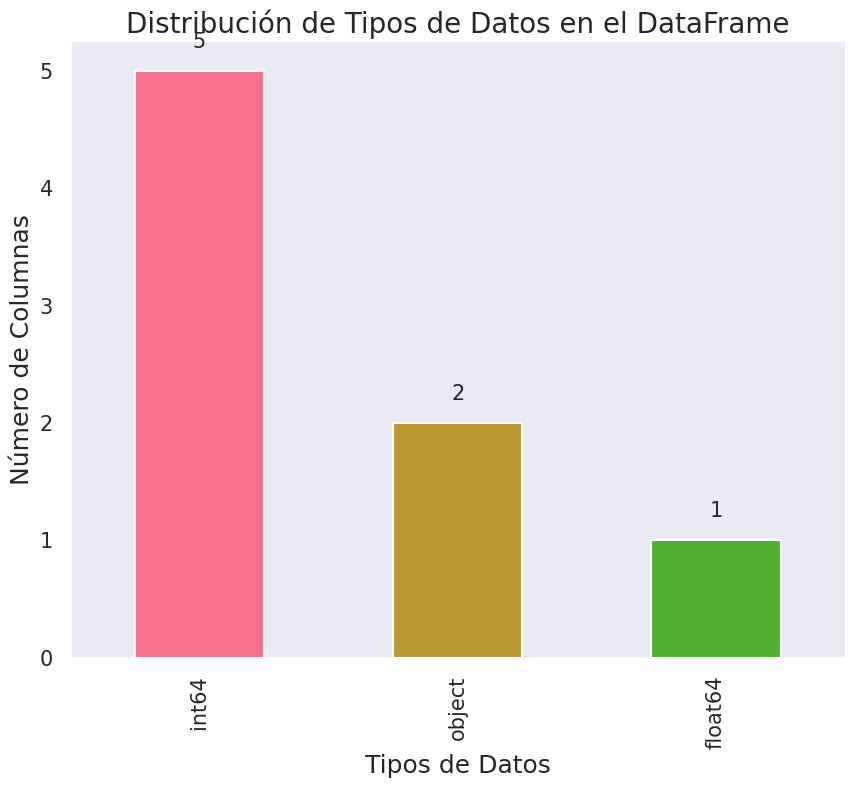

In [13]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = data.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [28]:
#Información de los datos
print("Número de filas: ",data.shape[0])
print("Número de Columnas:",data.shape[1])
print("Datos Duplicados",data.duplicated().sum())
print("Variables Categóricas: ",data.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",data.select_dtypes(exclude='object').shape[1])

Número de filas:  161
Número de Columnas: 8
Datos Duplicados 0
Variables Categóricas:  2
Variables Numéricas:  6


In [30]:
#datos nulos por columna
data.isnull().sum().sort_values(ascending=False)

url               39
# of comments     32
Title              0
Word count         0
# of Links         0
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

Text(0, 0.5, 'Filas')

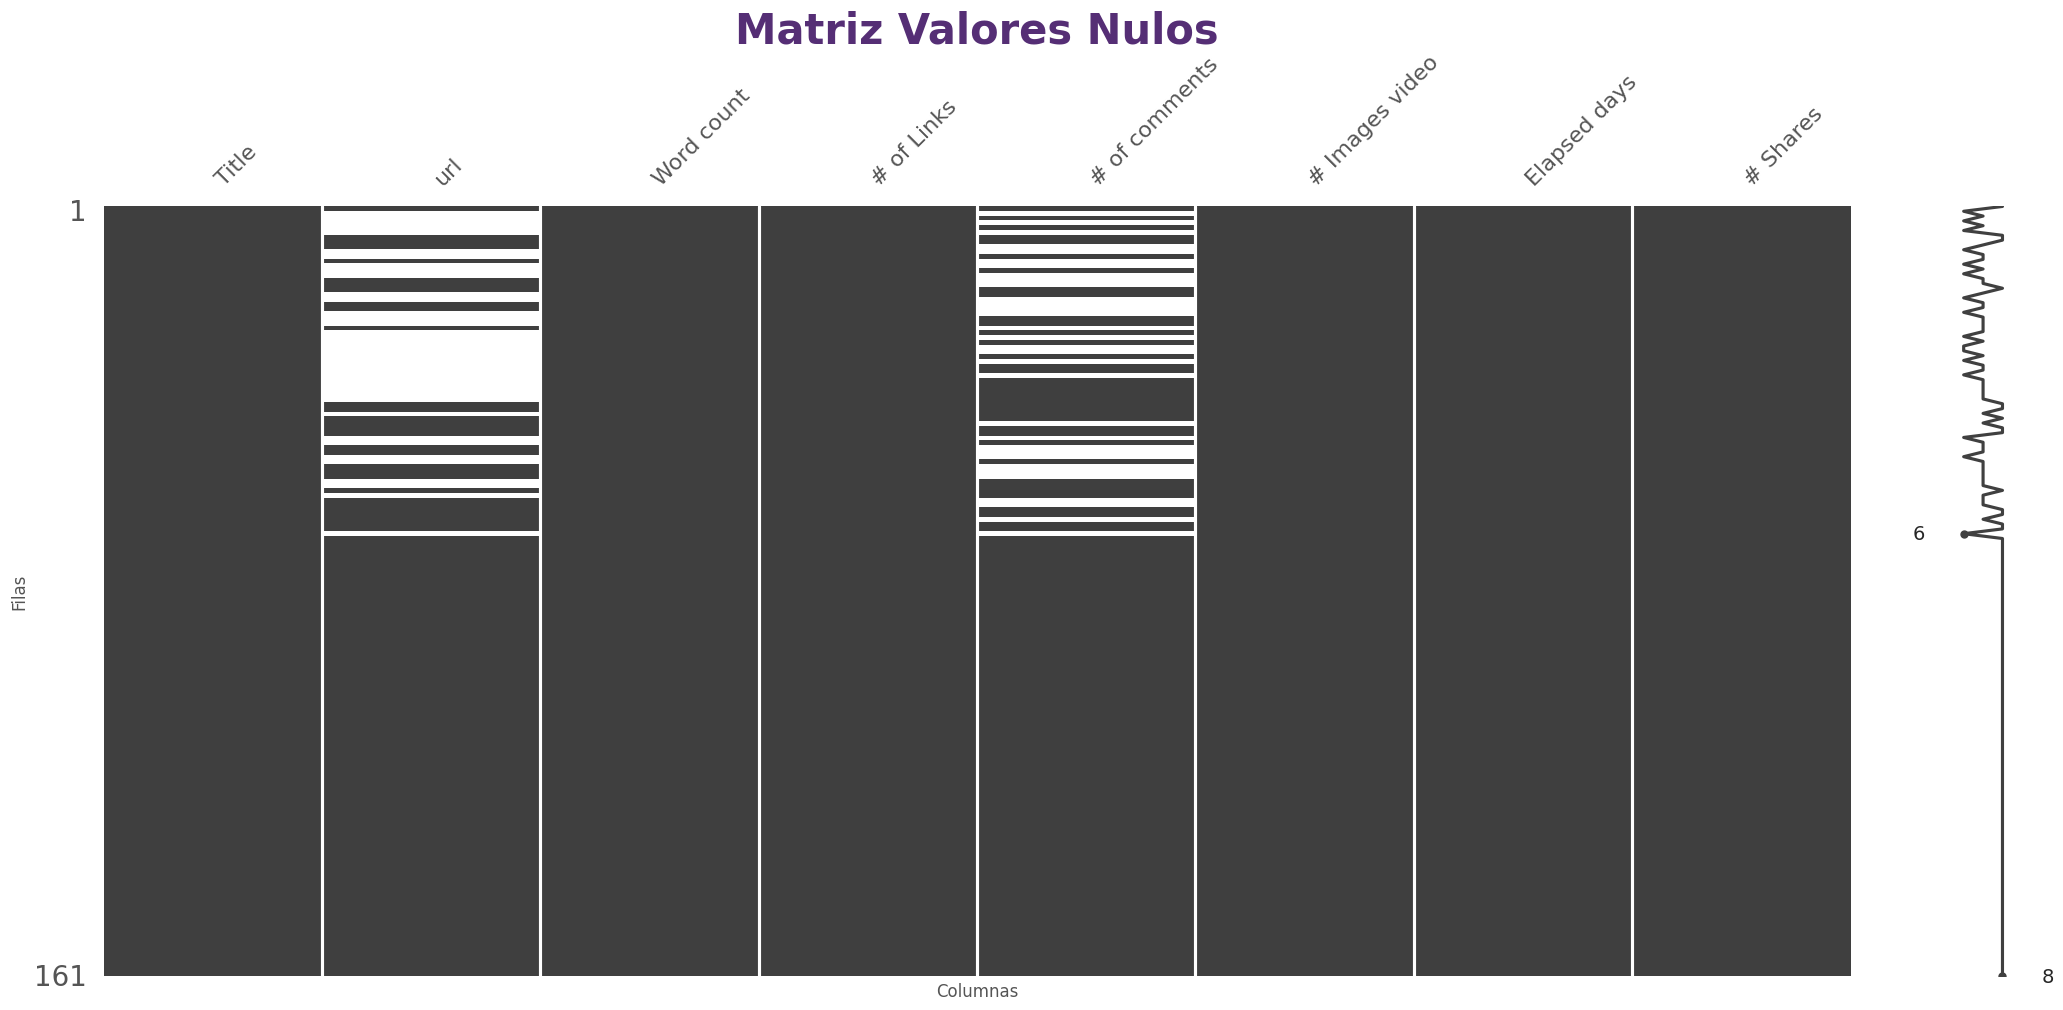

In [33]:
# Visualización con seaborn de los valores nulos
msno.matrix(data)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

<Figure size 1000x800 with 0 Axes>

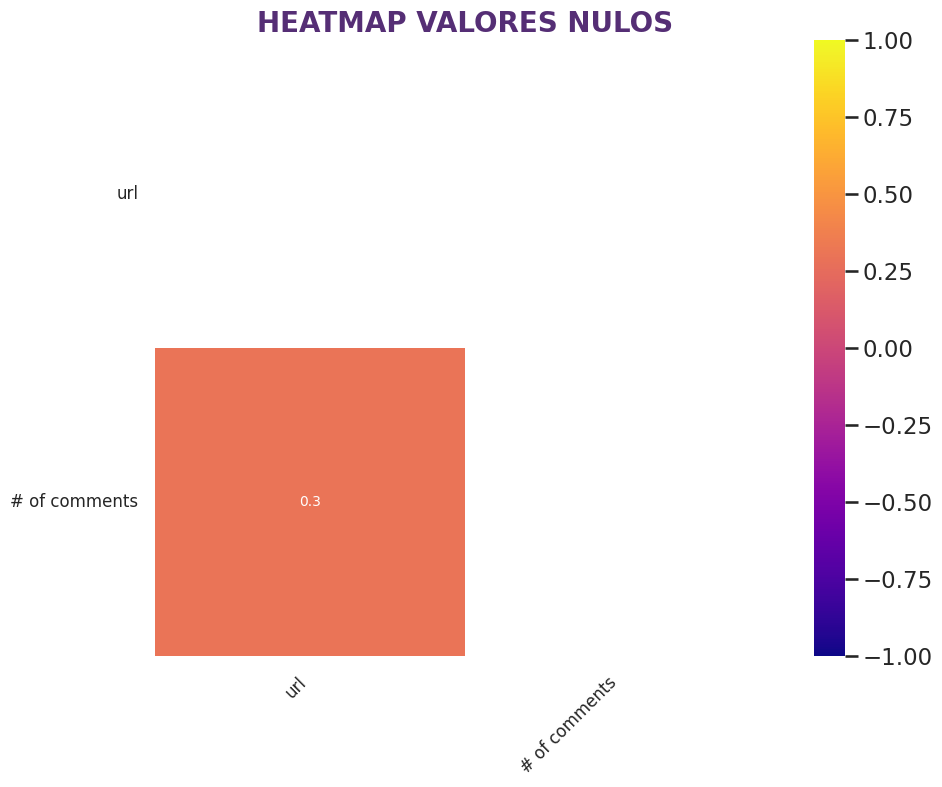

In [34]:
# Establecemos el estilo de Seaborn con un fondo oscuro
sns.set(style="dark", context="talk", font_scale=1, palette="plasma")

# Creamos una figura de tamaño personalizado con fondo negro
plt.figure(figsize=(10, 8), facecolor='black')

# Utilizamos msno.heatmap para el mapa de calor
msno.heatmap(data, cmap='plasma', vmin=-1, vmax=1, cbar=True, figsize=(10, 8), fontsize=12)

# Añadimos un título al gráfico
plt.title('HEATMAP VALORES NULOS', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#552E75'})

# Mostramos el gráfico
plt.show()

In [35]:
# Filtramos por Country_code
columna_a_filtrar = 'url'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
data = data.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de data después de eliminar nulos en 'url':")
print(data.info())

Información de data después de eliminar nulos en 'url':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           122 non-null    object 
 1   url             122 non-null    object 
 2   Word count      122 non-null    int64  
 3   # of Links      122 non-null    int64  
 4   # of comments   106 non-null    float64
 5   # Images video  122 non-null    int64  
 6   Elapsed days    122 non-null    int64  
 7   # Shares        122 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 8.6+ KB
None


In [36]:
# Filtramos por Country_code
columna_a_filtrar = '# of comments'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
data = data.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de data después de eliminar nulos en '# of comments':")
print(data.info())

Información de data después de eliminar nulos en '# of comments':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           106 non-null    object 
 1   url             106 non-null    object 
 2   Word count      106 non-null    int64  
 3   # of Links      106 non-null    int64  
 4   # of comments   106 non-null    float64
 5   # Images video  106 non-null    int64  
 6   Elapsed days    106 non-null    int64  
 7   # Shares        106 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 7.5+ KB
None


In [37]:
#datos nulos por columna
data.isnull().sum().sort_values(ascending=False)

Title             0
url               0
Word count        0
# of Links        0
# of comments     0
# Images video    0
Elapsed days      0
# Shares          0
dtype: int64

Text(0, 0.5, 'Filas')

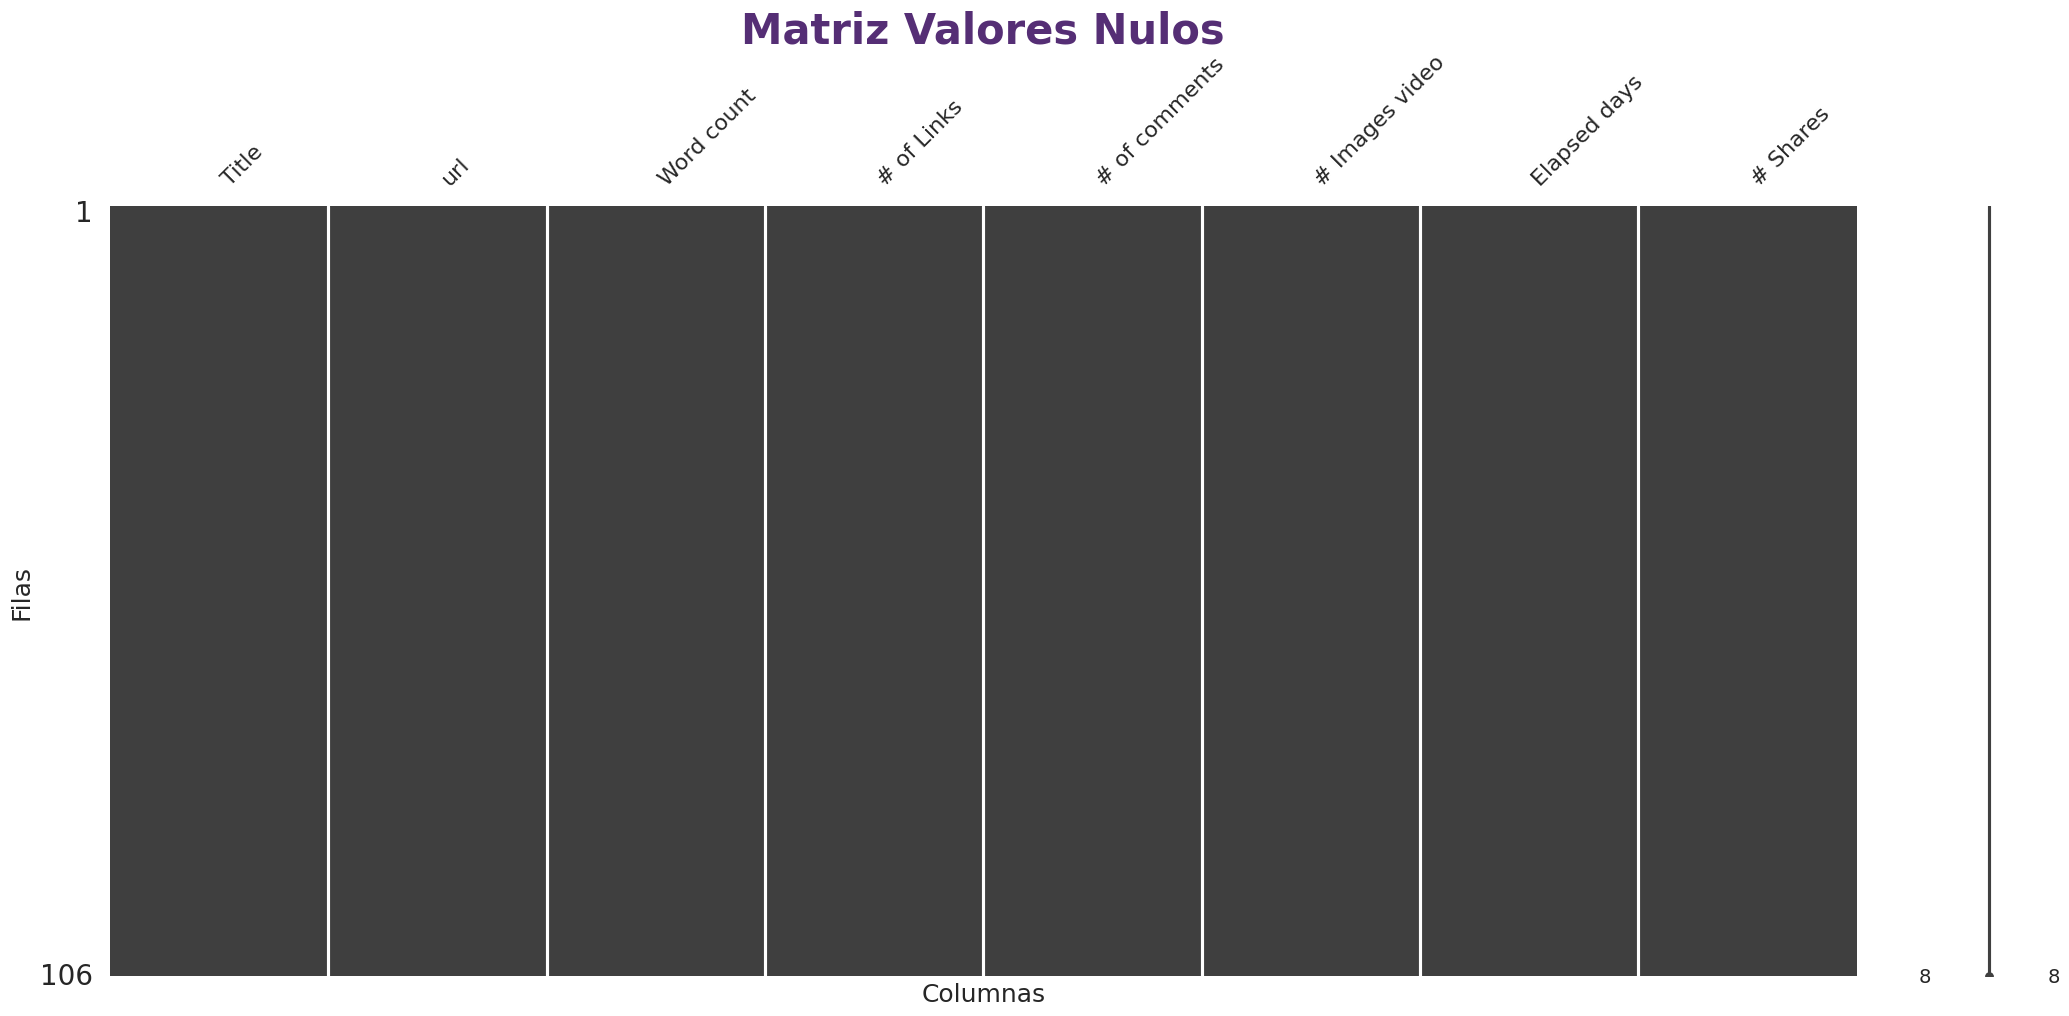

In [38]:
# Visualización con seaborn de los valores nulos
msno.matrix(data)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [47]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [48]:
estadisticos_cont(data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Word count,106.0,1968.037736,1922.5,909.294713,250.0,1231.25,1922.5,2538.50,6462.0
# of Links,106.0,10.745283,5.0,57.977346,1.0,3.00,5.0,7.00,600.0
# of comments,106.0,7.216981,7.0,5.623090,0.0,3.00,7.0,11.00,29.0
# Images video,106.0,3.405660,3.0,2.592217,1.0,2.00,3.0,4.75,22.0
Elapsed days,106.0,62.141509,48.5,67.027704,1.0,23.25,48.5,72.75,349.0
# Shares,106.0,26876.301887,20354.0,31878.084386,0.0,4622.00,20354.0,36453.00,200000.0


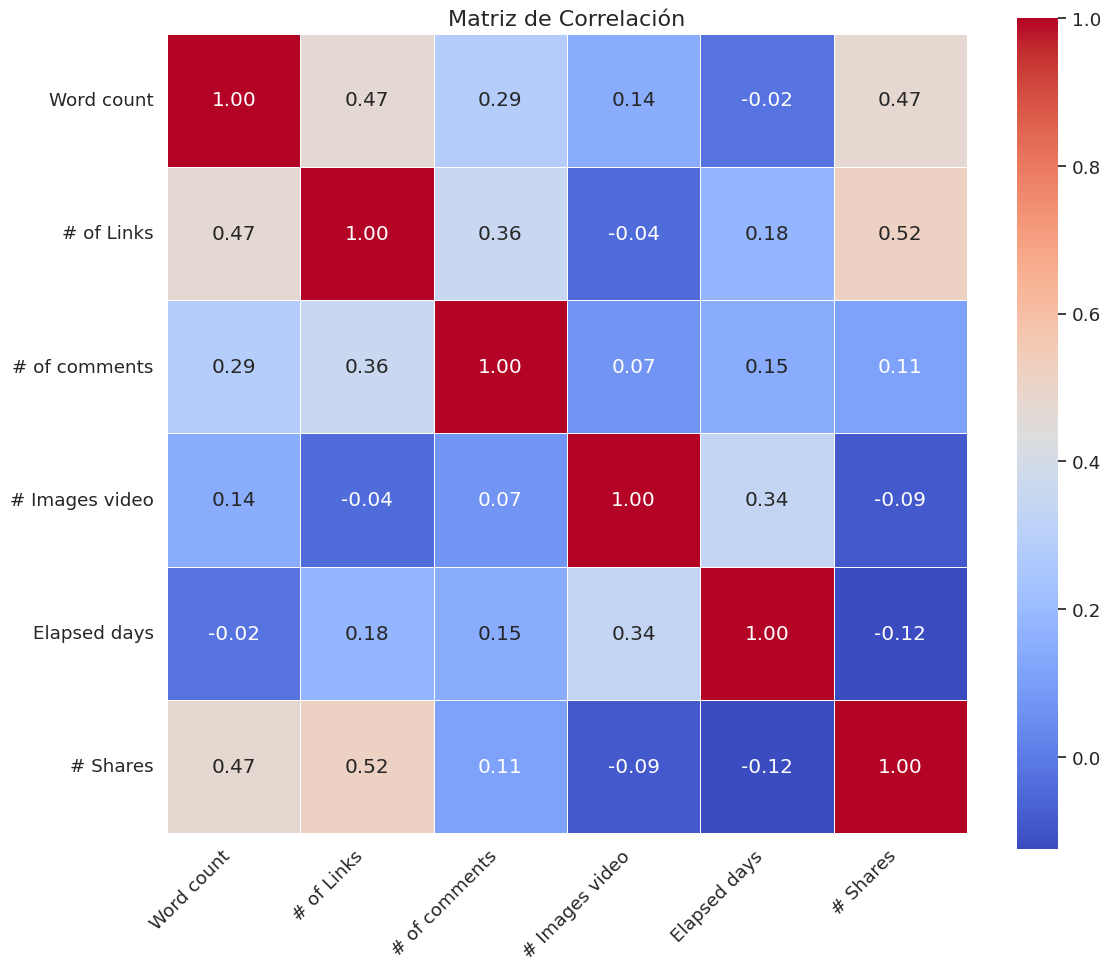

In [49]:
# Filtrar las columnas numéricas
df_numeric = data.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

<ipython-input-50-0e47da58d244>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title','url', 'Elapsed days'],1).hist()


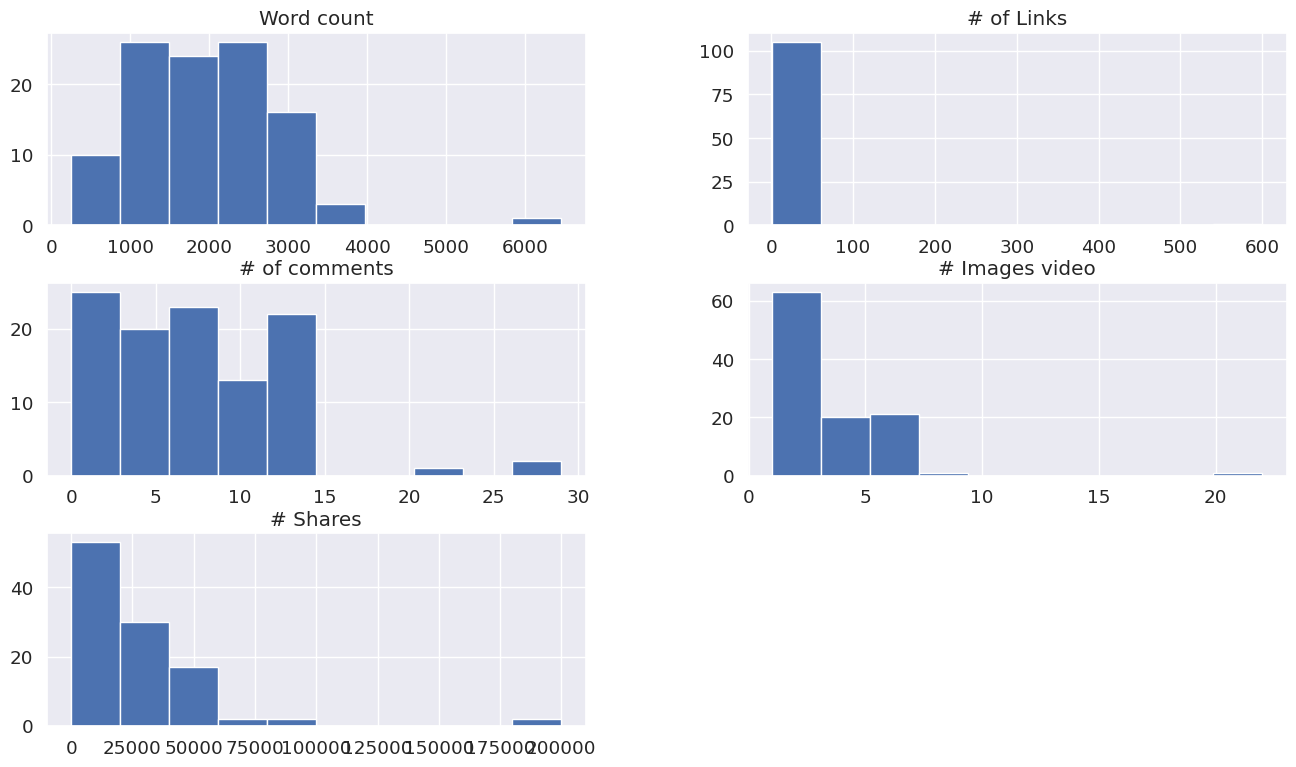

In [50]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

En estas gráficas vemos entre qué valores se concentran la mayoría de registros.

Vamos a filtrar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también con los que tengan Cantidad de compartidos menos a 80.000. Lo gratificaremos pintando en azul los puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

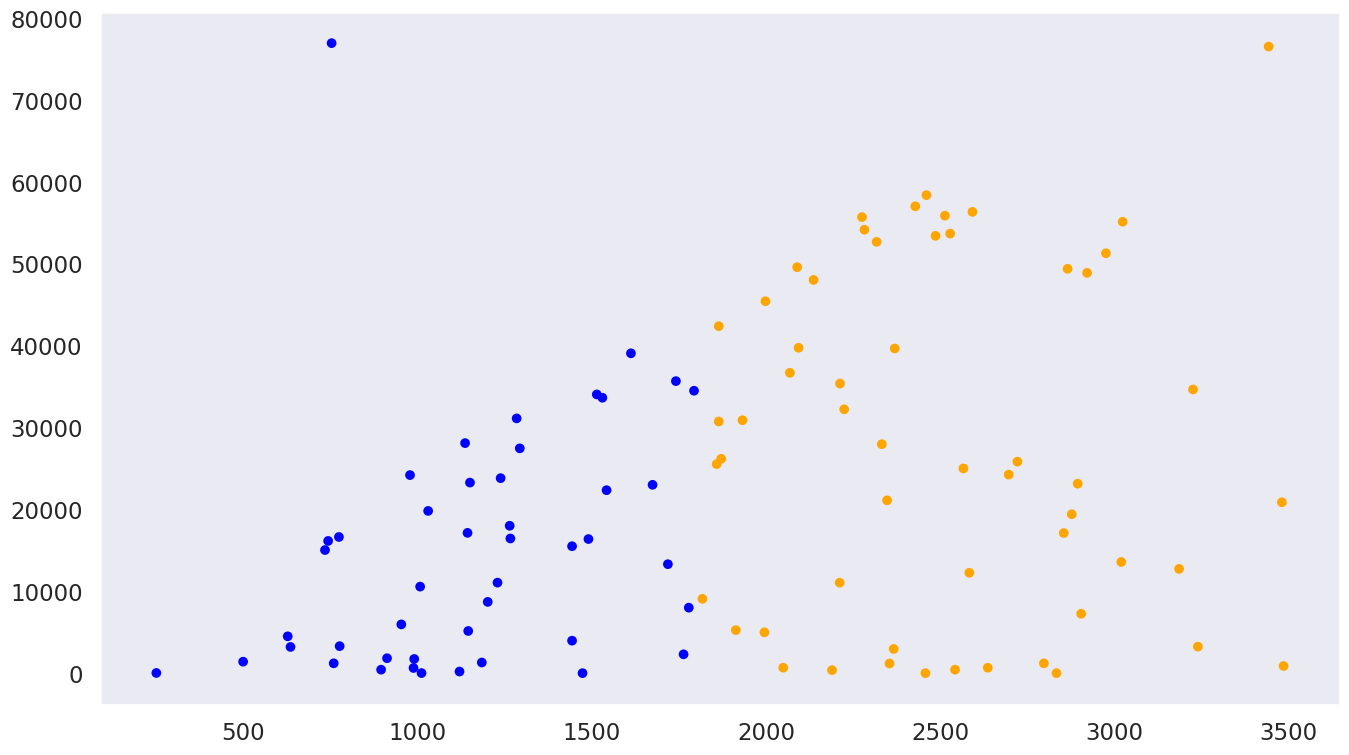

In [40]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

## Regresión Lineal con Python y SKLearn

Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los # Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 5,69 y el término independiente “b” es 11200. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno 😉 Pero estamos aprendiendo a usarlo, que es lo que nos importa ahora 🙂 Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

Coefficients: 
 [8.10985309]
Independent term: 
 7012.960216783782
Mean squared error: 340159718.74
Variance score: 0.11


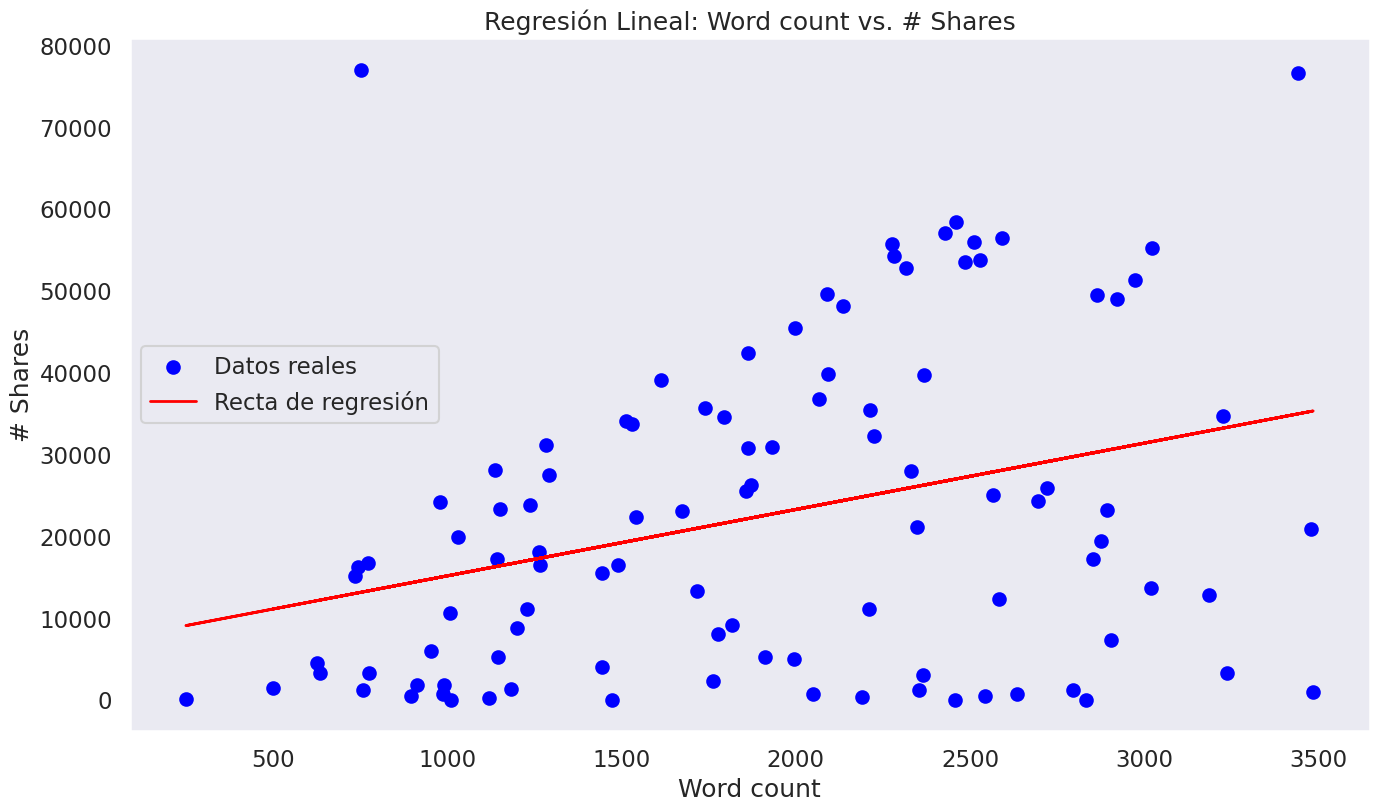

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva es una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

# Graficar los datos y la recta de regresión
plt.scatter(X_train, y_train, color='blue', label='Datos reales')  # Scatter plot de los datos reales
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Recta de regresión')  # Línea de regresión

# Etiquetas y título
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.title('Regresión Lineal: Word count vs. # Shares')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


## Predicción en regresión lineal simple

Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir cuántos “compartir” obtendrá un articulo sobre ML de 2000 palabras

In [42]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))


23232


<ipython-input-42-7b9cd58d80ff>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


## Regresión Lineal Múltiple en Python


Vamos a extender el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da mayor poder al algoritmo de Machine Learning, pues de esta manera podremos obtener predicciones más complejas.

Nuestra “ecuación de la Recta”, ahora pasa a ser:

    Y = b + m1 X1 + m2 X2 + … + m(n) X(n)

y deja de ser una recta)

En nuestro caso, utilizaremos 2 “variables predictivas” para poder graficar en 3D, pero recordar que para mejores predicciones podemos utilizar más de 2 entradas y prescindir del grafico.

Nuestra primer variable seguirá siendo la cantidad de palabras y la segunda variable será la suma de 3 columnas de entrada: la cantidad de enlaces, comentarios y cantidad de imágenes.

In [43]:
#Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Ya tenemos nuestras 2 variables de entrada en XY_train y nuestra variable de salida pasa de ser “Y” a ser el eje “Z”.

Creamos un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que entrenar: las que contiene XY_train. Al igual que antes, imprimimos los coeficientes y puntajes obtenidos:

In [44]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   8.33324873 -499.94657834]
Mean squared error: 325289225.67
Variance score: 0.15


Como vemos, obtenemos 2 coeficientes (cada uno correspondiente a nuestras 2 variables predictivas), pues ahora lo que graficamos no será una linea si no, un plano en 3 Dimensiones.

El error obtenido sigue siendo grande, aunque algo mejor que el anterior y el puntaje de Varianza mejora casi el doble del anterior (aunque sigue siendo muy malo, muy lejos del 1).

## Visualizar un plano en 3 Dimensiones en Python

Graficaremos nuestros puntos de las características de entrada en color azul y los puntos proyectados en el plano en rojo. Recordemos que en esta gráfica, el eje Z corresponde a la “altura” y representa la cantidad de Shares que obtendremos.

<ipython-input-45-8836c9c66117>:33: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
<ipython-input-45-8836c9c66117>:34: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
<ipython-input-45-8836c9c66117>:35: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))


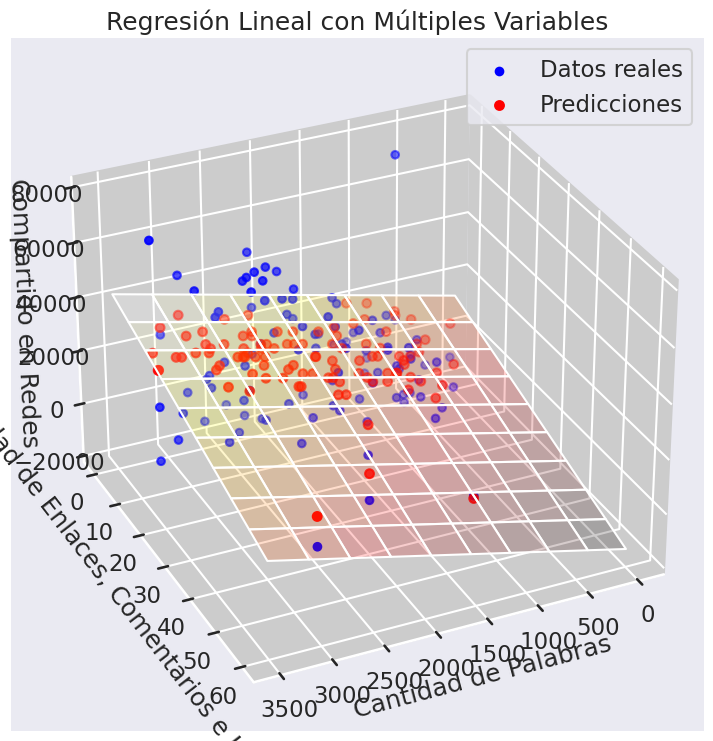

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import linear_model

#  'regr2' es tu modelo entrenado con múltiples variables
#  'XY_train' es tu conjunto de entrenamiento
#  'z_train' son las etiquetas reales y 'z_pred' son las predicciones

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30, label='Datos reales')

# Graficamos en rojo, los puntos predichos
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40, label='Predicciones')

# Añadir plano de fondo
ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

# Ajustar el ángulo de vista
ax.view_init(elev=30., azim=65)

# Añadir leyenda
ax.legend()

# Añadir etiquetas y título
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces, Comentarios e Imágenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

# Mostrar el gráfico
plt.show()



Podemos rotar el gráfico para apreciar el plano desde diversos ángulos modificando el valor del parámetro azim en view_init con números de 0 a 360.

## Predicción con el modelo de Mútiples Variables

Veamos ahora, que predicción tendremos para un artículo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imágenes.

In [46]:

# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con:
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

21083


<ipython-input-46-159474624394>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(z_Dosmil))


Conclusion y Mejora de nuestro modelo

Hemos visto cómo utilizar SKLearn en Python para crear modelos de Regresión Lineal con 1 o múltiples variables. En nuestro ejercicio no tuvimos una gran confianza  en las predicciónes. Por ejemplo en nuestro primer modelo, con 2000 palabras nos predice que podemos tener 22595 pero el margen de error haciendo raíz del error cuartico medio es más menos 19310. Es decir que escribiendo un artículo de 2000 palabras lo mismo tenemos 3285 Shares que 41905. En este caso usamos este modelo para aprender a usarlo y habrá que ver en otros casos en los que sí nos brinde predicciones acertadas.

Para mejorar nuestro modelo, deberíamos utilizar más dimensiones y encontrar datos de entrada mejores. Atención: también es posible, que no exista ninguna relación nunca entre nuestras variables de entrada y el éxito en Shares del artículo… con lo cual… nunca podremos predecir con certeza esta salida.